<a href="https://colab.research.google.com/github/Dullard-boy/Hamoye-Data-Science-Internship-2023/blob/main/HDSC'23_Spring_Cohrot_Stage_E_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# import necessary librariies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
data =pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv')

In [15]:
pip install prophet

In [46]:
#checking for missing values
data.isnull().values.any()

False

In [50]:
from datetime import datetime
data['FullDate'] = pd.to_datetime(data.FullDate)

# Rename the Columns FullDate And ElecPrice
data = data.rename(columns={"FullDate" : "ds" , "ElecPrice" : "y" })
data.set_index('ds', inplace=True)
data.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


Text(0.5, 1.0, 'Plot of ElecPrice over time')

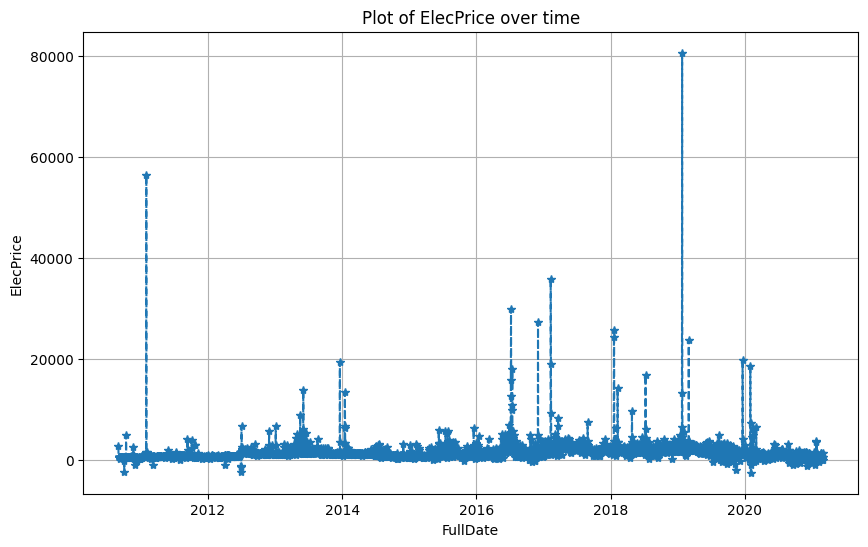

In [51]:
data_daily = data.resample('D').sum()
plt.figure(figsize=(10,6))
plt.plot(data_daily.index, data_daily.y, '--', marker='*', )
plt.grid()
plt.xlabel('FullDate')
plt.ylabel('ElecPrice')
plt.title('Plot of ElecPrice over time')

In [52]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
data_sysload = adfuller(data_daily['SysLoad'])
data_gasprice = adfuller(data_daily['GasPrice'])
print(f'p-value of the SysLoad: {round(data_sysload[1],6)}')
print(f'p-value of the GasPrice: {round(data_gasprice[1],6)}')

p-value of the SysLoad: 0.004254
p-value of the GasPrice: 0.045027


In [53]:
data_gasprice = adfuller(data_daily['GasPrice'])
print(f'ADF Statistic: {round(data_gasprice[0],4)}')
print('Critical Values:')
for k, v in data_gasprice[4].items():
  print(f'   {k}: {v}')

ADF Statistic: -2.9028
Critical Values:
   1%: -3.4320693157877544
   5%: -2.8622996992165364
   10%: -2.5671743978048323


In [54]:
data_elecprice = adfuller(data_daily['y'])
print(f'ADF Statistic: {round(data_elecprice[0],4)}')
print('Critical Values:')

for k, v in data_elecprice[4].items():
 print(f'{k} : {v}')

ADF Statistic: -8.2691
Critical Values:
1% : -3.432066157296446
5% : -2.8622983040036005
10% : -2.5671736550459663


In [55]:
data_daily.reset_index(inplace=True)
test_data = data_daily.iloc[2757:,:]
train_data = data_daily.iloc[:2757,:]

In [56]:
def mape(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.mean(np.abs((y - yhat)/y)*100),2)

In [57]:
from prophet import Prophet
# fit train data to fb prophet model
model_1 = Prophet()
model_1.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfvhg415d/1mcifpvy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfvhg415d/ip891q_j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58245', 'data', 'file=/tmp/tmpfvhg415d/1mcifpvy.json', 'init=/tmp/tmpfvhg415d/ip891q_j.json', 'output', 'file=/tmp/tmpfvhg415d/prophet_modele8q8ext7/prophet_model-20230801224919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:49:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:49:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [58]:
pred1 = model_1.predict(test_data)
mape(test_data['y'],pred1['yhat'])

544.09

In [61]:
rmse = lambda y, yhat: round(np.sqrt(np.mean(np.square(np.array(y) - np.array(yhat)))), 2)


In [62]:
rmse(test_data['y'], pred1['yhat'])

3207.46

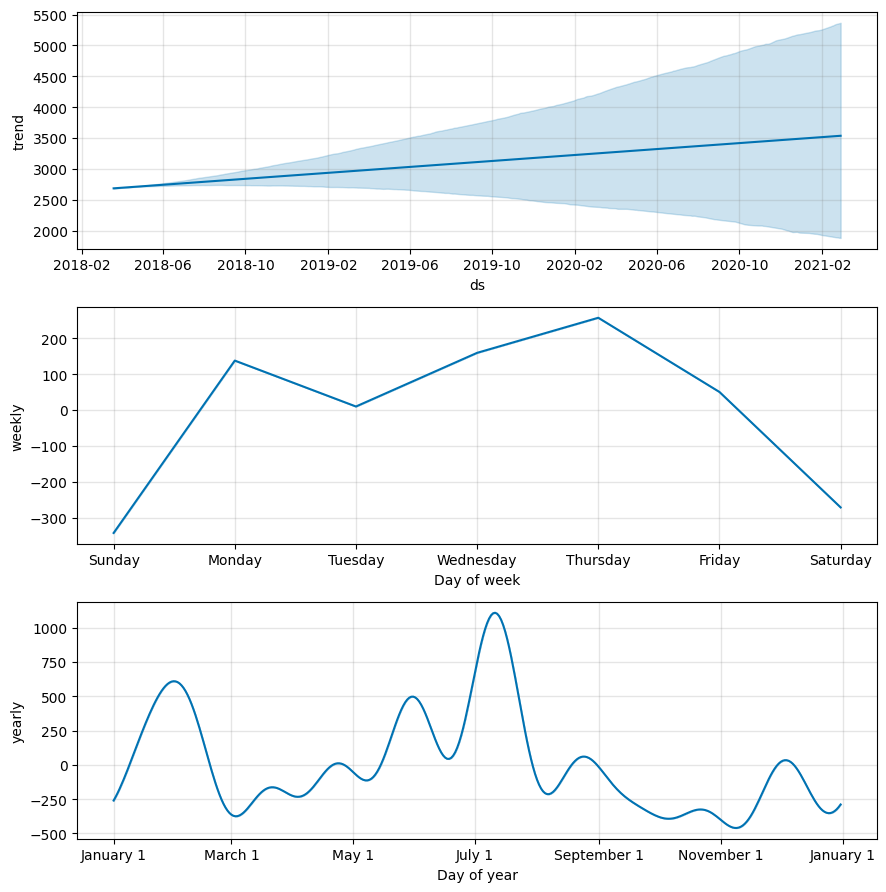

In [63]:
model_1.plot_components(pred1)
plt.show()

In [64]:
new_data = data_daily.rename(columns={"SysLoad" : "add1" , "Tmax" : "add2", "GasPrice" : "add3" })

In [67]:
train_data2 = new_data[:2757]
test_data2 = new_data[2757:]

In [68]:
#Create multivariate model
model2 = Prophet()

model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

In [69]:
model2.fit(train_data2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfvhg415d/dvtriks6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfvhg415d/0lrgsmf4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87166', 'data', 'file=/tmp/tmpfvhg415d/dvtriks6.json', 'init=/tmp/tmpfvhg415d/0lrgsmf4.json', 'output', 'file=/tmp/tmpfvhg415d/prophet_modeluzys34wa/prophet_model-20230801225316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:53:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:53:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [70]:
pred2 = model2.predict(test2)
mape(test_data['y'],pred2['yhat'])

231.48

In [71]:
rmse(test2['y'],pred2['yhat'])

2707.16

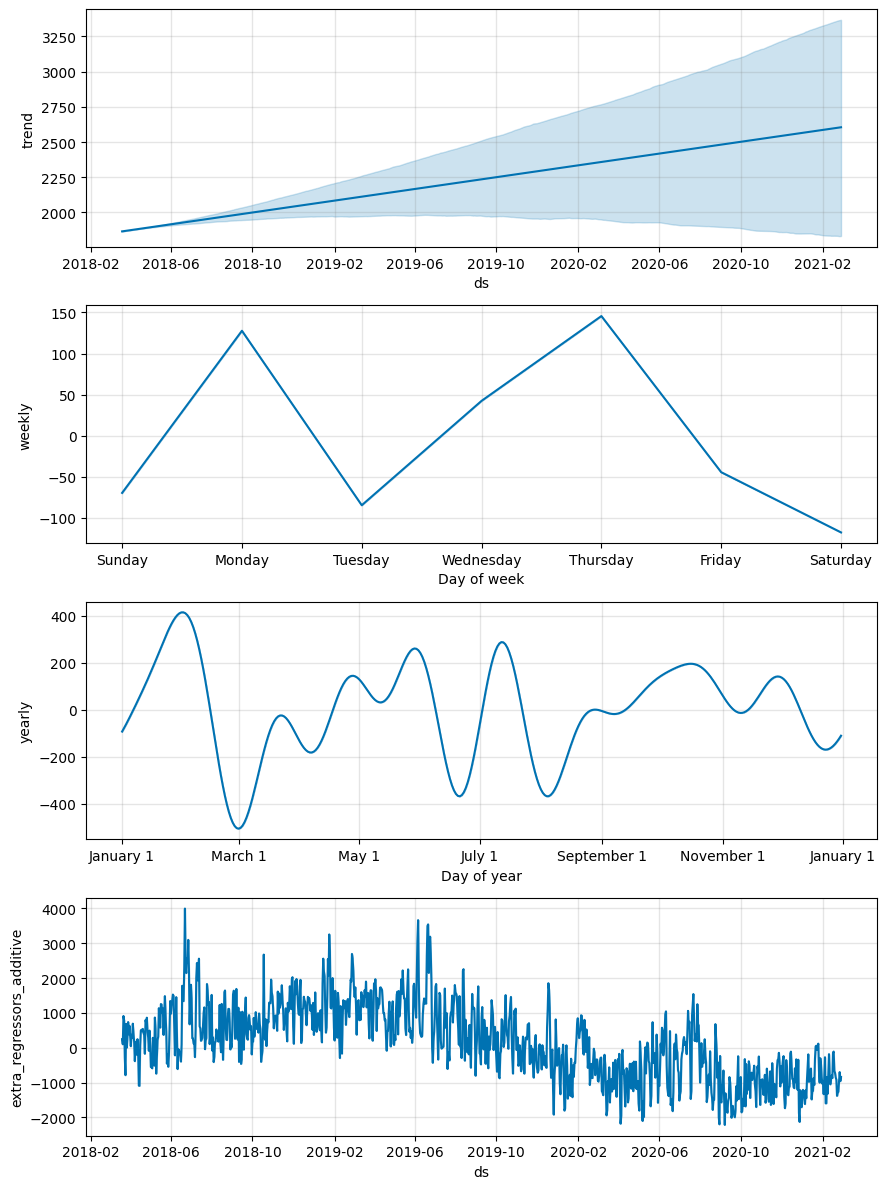

In [72]:
model2.plot_components(pred2)
plt.show()

In [73]:
train_data3 = new_data.iloc[:2757,:]
test_data3 = new_data.iloc[2757:,:]

In [74]:
model_3 = Prophet()
model_3.add_regressor('add1')
model_3.add_regressor('add3')

In [75]:
model_3.fit(train_data3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfvhg415d/wqstqqv9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfvhg415d/o0g8sazx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64191', 'data', 'file=/tmp/tmpfvhg415d/wqstqqv9.json', 'init=/tmp/tmpfvhg415d/o0g8sazx.json', 'output', 'file=/tmp/tmpfvhg415d/prophet_modelxv0qsz24/prophet_model-20230801225502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:55:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:55:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [77]:
pred3 = model_3.predict(test_data3)
mape(test_data3['y'],pred3['yhat'])

232.0

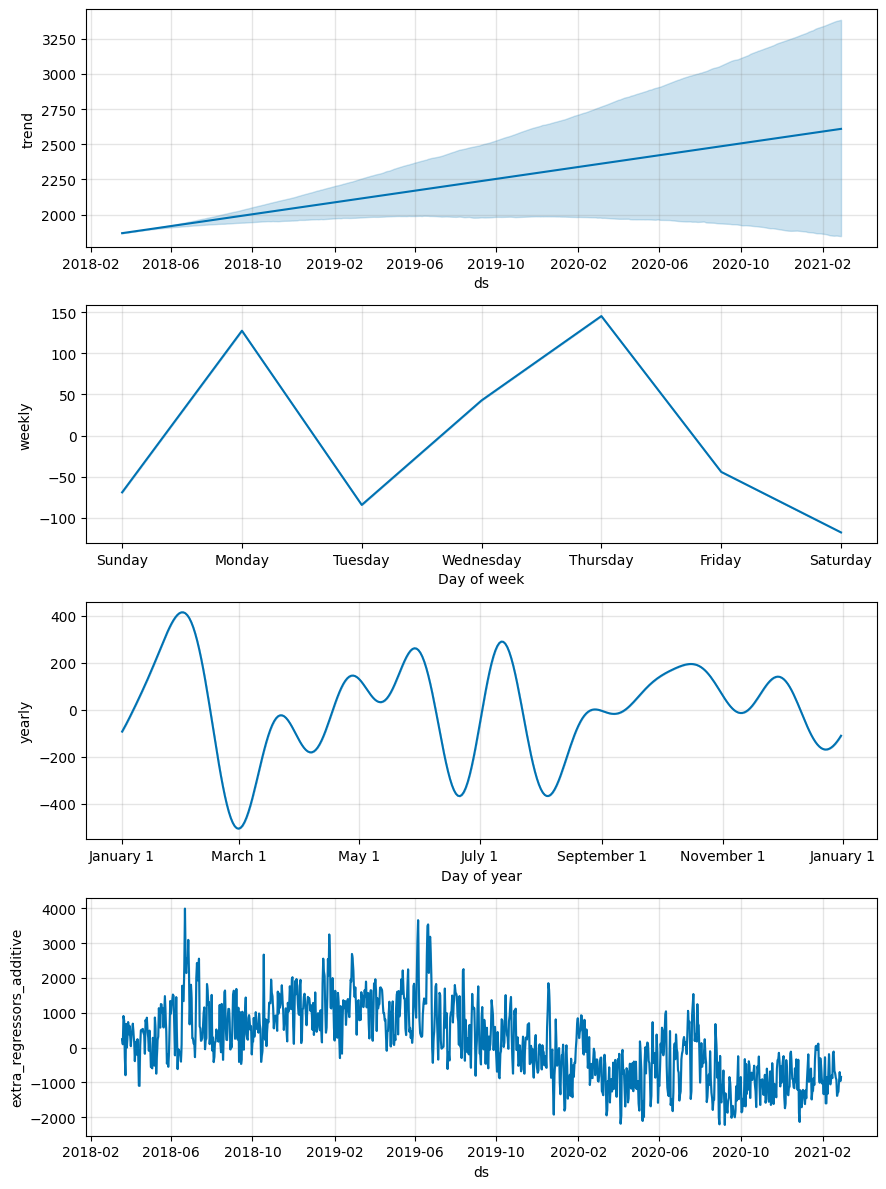

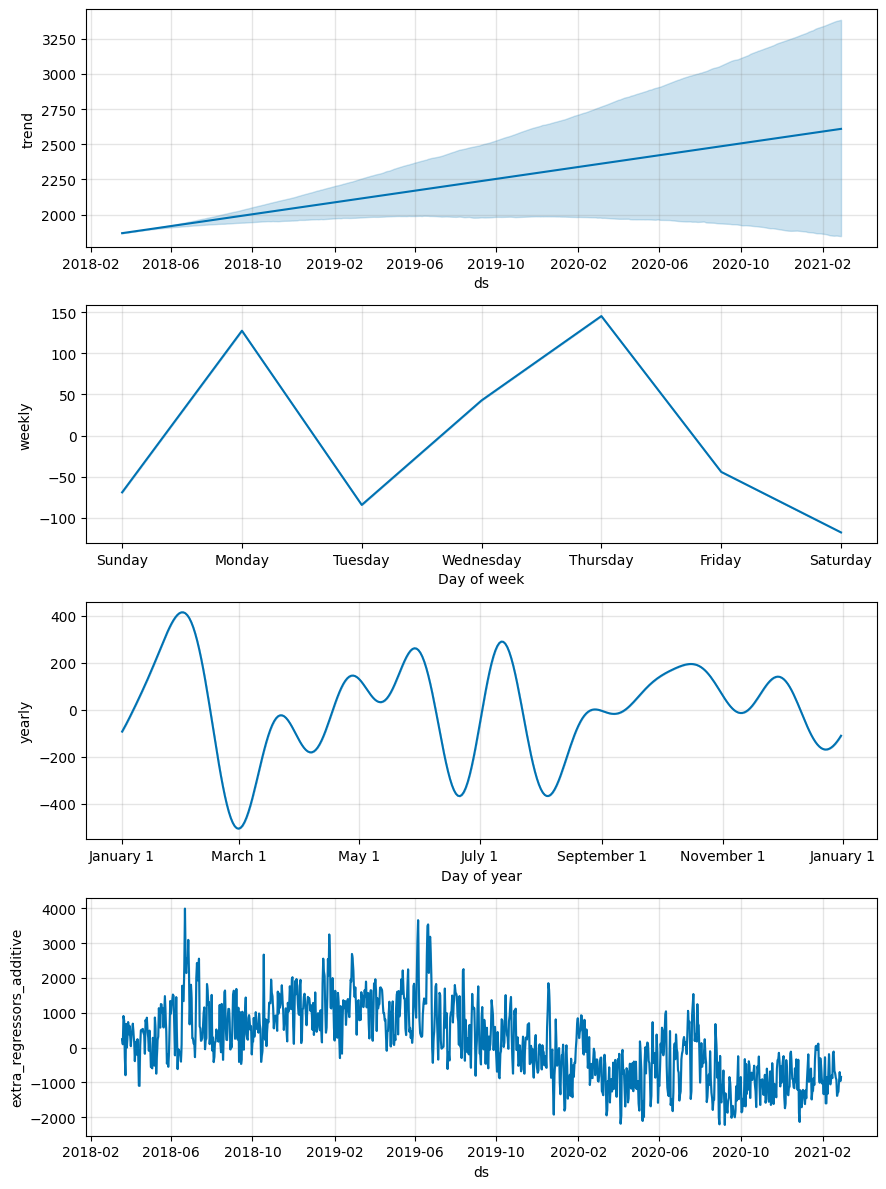

In [78]:
model_3.plot_components(pred3)